In [8]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas
import matplotlib.pyplot as plt
import numpy as np

all_data = pandas.read_csv('flats_for_clustering.tsv', header=0, sep='\t')
print("Flat:", pandas.unique(all_data["Piętro"]))
print("Number of flats:", pandas.unique(all_data["Liczba pięter w budynku"]))
print("Number of rooms:", pandas.unique(all_data["Liczba pokoi"]))

Flat: ['parter' '2' '5' '12' '1' '3' nan '8' '4' '16' '7' '6' 'poddasze' '9'
 '11' '13' '14' '10' '15' 'niski parter']
Number of flats: [ 5.  3. 16.  2. 13.  1. nan  7.  8.  4. 15.  6. 10. 12. 11. 14.  9. 18.]
Number of rooms: [2 3 4 1 5 6 8 7]


Prizes:


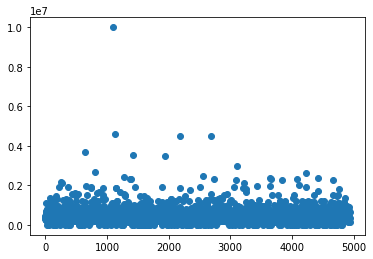

Sizes:


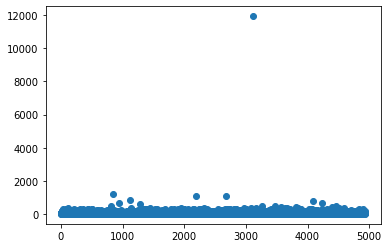

In [9]:
print("Prizes:")
plt.scatter(np.arange(0, len(all_data["cena"])), all_data["cena"])
plt.show()
print("Sizes:")
plt.scatter(np.arange(0, len(all_data["Powierzchnia w m2"])), all_data["Powierzchnia w m2"])
plt.show()

In [10]:
all_data["Piętro"] = all_data['Piętro'].apply(lambda x: '0' if x in ['parter', 'niski parter'] else x)
all_data["Piętro"] = all_data['Piętro'].apply(lambda x: '0' if x is np.nan else x)
all_data["Piętro"] = all_data['Piętro'].apply(lambda x: np.nan if x == 'poddasze' else x)

print("Before deleting NaN:", len(all_data))
all_data = all_data.dropna()
print("After deleting NaN:", len(all_data))

Before deleting NaN: 4938
After deleting NaN: 4783


In [11]:
all_data["Piętro"] = all_data["Piętro"].astype(float)
print("Before deleting unique results:", len(all_data))
all_data = all_data.loc[(all_data["cena"] < 3 * 10 ** 6) & (all_data["Powierzchnia w m2"] < 550)]
print("After deleting unique results:", len(all_data))

Before deleting unique results: 4783
After deleting unique results: 4771


In [12]:
m, n_plus_1 = all_data.values.shape
X = np.matrix(all_data.values).reshape(m, n_plus_1)
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
print(f"Clasters: {kmeans.labels_}")

C:\Users\rm4ae\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Clasters: [0 2 2 ... 2 4 0]


C:\Users\rm4ae\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


[ -6.69679724 -19.9117886   12.14413334 ...   5.53437526  49.31425374
  10.01900127]


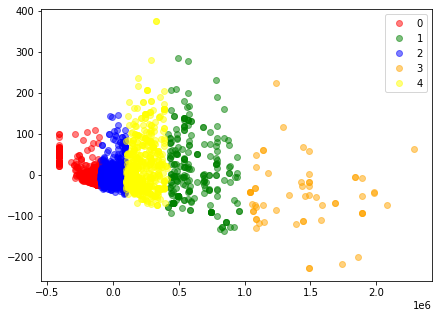

In [14]:
 pca = PCA(n_components=2).fit_transform(X)
print(pca[:, 1])

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)
colors = ['red', 'green', 'blue', 'orange', 'yellow']
handles = []
klaster = 0
for color in colors:
    to_add = []
    x = []
    y = []
    for index in range(len(pca)):
        if kmeans.labels_[index] == klaster:
            to_add.append(index)
    for index in to_add:
        x.append(pca[index, 0])
        y.append(pca[index, 1])
    handles.append(ax.scatter(x, y, c=color, alpha=0.5))
    klaster += 1

ax.legend(handles, [0, 1, 2, 3, 4])
plt.show()